In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/kaggle/input/mall-customers/Mall_Customers.csv')

In [2]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
X = df.iloc[:, [3,4]].values

we going to use elbow method.

wcss- within cluster sum of square

In [7]:
from sklearn.cluster import KMeans
wcss=[]

 Determining Optimal Clusters (Elbow Method):
What We're Doing: We're trying to figure out how many clusters (groups) we should split our data into.
How We Do It:
We run KMeans clustering for 1 cluster, 2 clusters, 3 clusters, and so on, up to 10 clusters.
For each number of clusters, we calculate something called WCSS, which tells us how well the points are clustered.
We store these WCSS values in a list.
2. Fitting the Final Model:
What We're Doing: After finding the best number of clusters, we create a KMeans model with that number of clusters.
How We Do It:
We choose the optimal number of clusters based on where the WCSS graph has an "elbow" (a point where the WCSS starts decreasing more slowly).
We fit the KMeans model to our data with this optimal number of clusters.
The model then predicts which cluster each data point belongs to.


magine you have a dataset with points spread out in a 2D space:

If you have only one cluster, all points are in the same group, and WCSS will be high because points far from the centroid contribute large squared distances.
If you increase the number of clusters, points get closer to their respective centroids, reducing WCSS.
At some point, increasing the number of clusters further won't significantly decrease WCSS, indicating the optimal number of clusters.

In [8]:
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

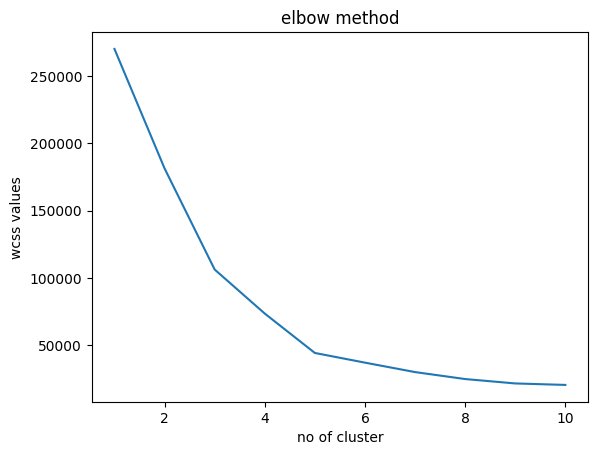

In [9]:
plt.plot(range(1,11),wcss)
plt.title('elbow method')
plt.xlabel('no of cluster')
plt.ylabel('wcss values')
plt.show()

optimal no of cluster are 5 since lboe formed at 5


In [10]:
kmeansmodel = KMeans(n_clusters=5,init='k-means++',random_state=0)

In [11]:
y_kmeans = kmeansmodel.fit_predict(X)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


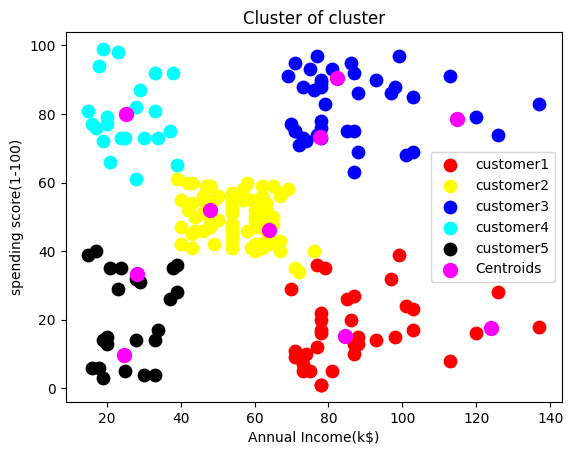

In [12]:
plt.scatter(X[y_kmeans==0,0], X[y_kmeans ==0,1],s=80,c='red',label='customer1')
plt.scatter(X[y_kmeans==1,0], X[y_kmeans ==1,1],s=80,c='yellow',label='customer2')
plt.scatter(X[y_kmeans==2,0], X[y_kmeans ==2,1],s=80,c='blue',label='customer3')
plt.scatter(X[y_kmeans==3,0], X[y_kmeans ==3,1],s=80,c='cyan',label='customer4')
plt.scatter(X[y_kmeans==4,0], X[y_kmeans ==4,1],s=80,c='black',label='customer5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='magenta',label='Centroids')
plt.title('Cluster of cluster')
plt.xlabel('Annual Income(k$)')
plt.ylabel('spending score(1-100)')
plt.legend()
plt.show()

1.cyan cluster represents costmer having less salary bt spending is high.
2.red with annaul slary is high bt spending is less.
3.yellow cluster is the target  audience with balance in spending and earning also max ppl are in this cluster.

